In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder


In [2]:
# Load the dataset
train_path = "C:/Users/enock/Downloads/data/new_train.csv"
test_path = "C:/Users/enock/Downloads/data/new_test.csv"

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
# 1. Normalize LotArea
scaler = MinMaxScaler()  # or StandardScaler() for standardization
train['LotArea_scaled'] = scaler.fit_transform(train[['LotArea']])
test['LotArea_scaled'] = scaler.transform(test[['LotArea']])

In [5]:
# 2. Treat Ordinal Features (Optional: OrdinalEncoder for explicit ordinal treatment)
ordinal_features = ['OverallQual', 'OverallCond']
ordinal_enc = OrdinalEncoder()
train[ordinal_features] = ordinal_enc.fit_transform(train[ordinal_features])
test[ordinal_features] = ordinal_enc.transform(test[ordinal_features])

In [6]:
# 3. Encode Categorical Features
nominal_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Neighborhood',
                    'HouseStyle', 'RoofStyle', 'RoofMatl', 'SaleCondition']


In [7]:
# One-hot encode nominal features with few categories
train = pd.get_dummies(train, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'SaleCondition'], drop_first=True)
test = pd.get_dummies(test, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'SaleCondition'], drop_first=True)


In [8]:
# Label encode nominal features with many categories (e.g., Neighborhood)
label_enc = OrdinalEncoder()
train['Neighborhood'] = label_enc.fit_transform(train[['Neighborhood']])
test['Neighborhood'] = label_enc.transform(test[['Neighborhood']])

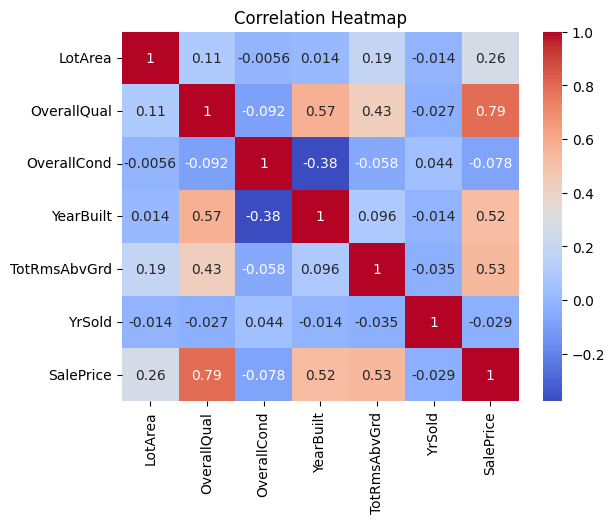

In [9]:
# 4. Preliminary Analysis
# Correlation heatmap for numerical features
numerical_features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotRmsAbvGrd', 'YrSold', 'SalePrice']
sns.heatmap(train[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

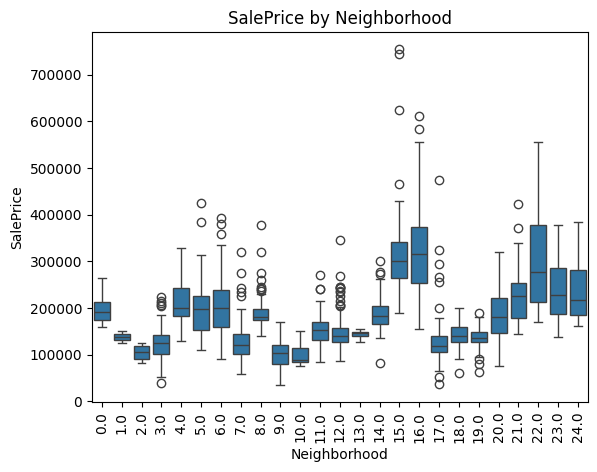

In [10]:
# Box plot for categorical features against SalePrice
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.title("SalePrice by Neighborhood")
plt.xticks(rotation=90)
plt.show()

In [11]:
# 5. Handle Missing Values
# Check missing values
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

In [12]:
# Separate numerical and categorical columns
# Separate numerical and categorical columns
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('SalePrice')  # Exclude target column
categorical_features = train.select_dtypes(include=['object']).columns

# Fill missing values for numerical features with the median
train[numerical_features] = train[numerical_features].fillna(train[numerical_features].median())
test[numerical_features] = test[numerical_features].fillna(test[numerical_features].median())

# Fill missing values for categorical features with the mode
for col in categorical_features:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(train[col].mode()[0], inplace=True)


In [16]:
# Save the preprocessed datasets
train.to_csv("C:/Users/enock/Downloads/data/train_preprocessed.csv", index=False)
test.to_csv("C:/Users/enock/Downloads/data/test_preprocessed.csv", index=False)